In [1]:
%pip install shapely
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import h2o
from h2o.automl import H2OAutoML
from shapely.geometry import Point
import sys 
sys.path.append("/Users/simenvoldqvam/Desktop/Skole/machine_learning/notebooks/shared")
import test



Note: you may need to restart the kernel to use updated packages.


In [2]:
h2o.init(ip ='localhost', port = 54321)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 37 mins
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"14 days, 5 hours and 20 minutes"
H2O_cluster_name:,H2O_from_python_simenvoldqvam_r4nopi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,621 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#importing stores_train
stores_train = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_train.csv')
stores_train = stores_train[stores_train['year']==2016]


#importing stores_test
stores_test = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_test.csv')
stores_test = stores_test[stores_test['year']==2016]

#importing stores_extra
stores_extra = pd.read_csv('/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/stores_extra.csv')
stores_extra = stores_extra[stores_extra['year']==2016]


#importing grunnkrets_age_distribution
grunnkrets_age_distribution = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_age_distribution.csv")
grunnkrets_age_distribution = grunnkrets_age_distribution[grunnkrets_age_distribution['year']==2016]
grunnkrets_age_distribution_new = grunnkrets_age_distribution.drop(['year'],axis=1)

#importing grunnkrets_norway_stripped
grunnkrets_norway_stripped = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_norway_stripped.csv")
grunnkrets_norway_stripped = grunnkrets_norway_stripped[grunnkrets_norway_stripped['year']==2016]
grunnkrets_norway_stripped_new = grunnkrets_norway_stripped.drop(['year'],axis=1)

#importing grunnkrets_households_num_persons
grunnkrets_households_num_persons = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_households_num_persons.csv")
grunnkrets_households_num_persons = grunnkrets_households_num_persons[grunnkrets_households_num_persons['year']==2016]
grunnkrets_households_num_persons_new = grunnkrets_households_num_persons.drop(['year'],axis=1)

#importing grunnkrets_income_households
grunnkrets_income_households = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/grunnkrets_income_households.csv")
grunnkrets_income_households = grunnkrets_income_households[grunnkrets_income_households['year']==2016]
grunnkrets_income_households_new = grunnkrets_income_households.drop(['year'],axis=1)

#importing plaace_hierarchy
plaace_hierarchy = pd.read_csv("/Users/simenvoldqvam/Desktop/Skole/machine_learning/data/raw/plaace_hierarchy.csv")




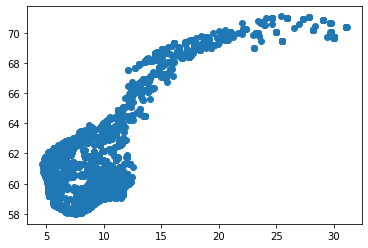

In [4]:
plt.scatter(stores_train['lon'],stores_train['lat'])


In [5]:
from sklearn. cluster import KMeans

stores_train_lat_lon = stores_train[['lon','lat']].to_numpy()
kmeans = KMeans(n_clusters=200).fit(stores_train_lat_lon)
kmeans.labels_

stores_test_lat_lon = stores_test[['lon','lat']].to_numpy()

predict = kmeans.predict(stores_test_lat_lon)


In [6]:

import plotly.express as px

px.scatter(x=stores_train['lon'],y=stores_train['lat'], color = kmeans.labels_)

In [7]:

#change lat and long to point

stores_train_drop = stores_train.drop(['year','lat','lon'], axis = 1)
stores_test_drop = stores_test.drop(['year','lat','lon'], axis = 1)

stores_train_drop['kmeans'] = kmeans.labels_
stores_test_drop['kmeans'] = predict


stores_train_drop

,store_id,store_name,plaace_hierarchy_id,sales_channel_name,grunnkrets_id,address,chain_name,mall_name,revenue,kmeans
0,983540538-974187930-44774,MCDONALD'S BRAGERNES TORG MAGASINET,1.1.1.0,Hamburger restaurants,6020303,BRAGERNES TORG 13,MCDONALDS,Magasinet Drammen,17.998,57
1,987074191-973117734-44755,MCDONALD'S KLINGENBERGGATA,1.1.1.0,Hamburger restaurants,3010306,NaN,MCDONALDS,NaN,23.828,33
2,984890265-981157303-64491,BURGER KING HØNEFOSS,1.1.1.0,Hamburger restaurants,6050102,KONG RINGS GATE 1,BURGER KING,Kuben Hønefoss,16.099,91
3,914057442-992924179-126912,BURGER KING GLASSHUSPASSASJEN,1.1.1.0,Hamburger restaurants,18040102,STORGATA 12,BURGER KING,Glasshuspassasjen,9.296,26
4,913018583-913063538-668469,BURGER KING TILLERTORGET,1.1.1.0,Hamburger restaurants,16017414,NaN,BURGER KING,Tillertorget,4.528,4
...,...,...,...,...,...,...,...,...,...,...
12854,915789943-915806929-781991,MEIERIGÅRDEN BRYGGERIUTSALG,2.8.11.2,Beer and soda shop,7010705,THUEGATA 2,NaN,NaN,0.088,189
12855,917921733-917982368-868081,GULATING ØLUTSALG CC GJØVIK,2.8.11.2,Beer and soda shop,5020406,NaN,GULATING GRUPPEN,CC Gjøvik,1.816,175
12856,911721961-911764474-496764,GULATING ØLUTSALG STRØMMEN,2.8.11.2,Beer and soda shop,2310803,STØPERIVEIEN 6,GULATING GRUPPEN,Strømmen Storsenter,38.225,122
12857,914337046-914343372-721294,DET GODE BRYGG,2.8.11.2,Beer and soda shop,11020113,VÅGSGATA 16,NaN,Bystasjonen,3.642,113


In [8]:
stores_train_hf = h2o.H2OFrame(stores_train_drop)
stores_test_hf = h2o.H2OFrame(stores_test_drop)
#stores_extra_hf = h2o.H2OFrame(stores_extra)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
#very simple training model with h2o
x = stores_train_hf.columns
y = 'revenue'
x.remove(y)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame= stores_train_hf) 


AutoML progress: |
21:16:24.580: _train param, Dropping bad and constant columns: [store_id, store_name]

██
21:16:33.642: _train param, Dropping bad and constant columns: [store_id, store_name]

███
21:16:53.991: GLM_1_AutoML_6_20221110_211624 [GLM def_1] failed: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
21:16:54.1: _train param, Dropping bad and constant columns: [store_id, store_name]
21:16:56.844: _train param, Dropping bad and constant columns: [store_id, store_name]

█
21:17:02.65: _train param, Dropping bad and constant columns: [store_id, store_name]

██
21:17:43.794: _train param, Dropping bad and constant columns: [store_id, store_name]


21:17:46.114: _train param, Dropping bad and constant columns: [store_id, store_name]

█
21:17:48.331: _train param, Dropping bad and constant columns: [store_id, store_name]

██
21:17:55.830: _train param, Dropping bad and constant columns: [store_id, store_name]

█


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,4.751577,0.1766697,4.734347,4.5194936,4.766283,5.0154285,4.7223315
mean_residual_deviance,93.37965,16.752167,81.70381,72.57786,97.77476,115.78362,99.0582
mse,93.37965,16.752167,81.70381,72.57786,97.77476,115.78362,99.0582
null_deviance,608293.75,101893.8750000,676270.8,468778.75,578255.2,734523.75,583640.25
r2,0.6029844,0.0476565,0.6832346,0.5987276,0.5566464,0.5925957,0.5837177
residual_deviance,239939.77,42316.137,214063.98,187541.19,256365.4,298837.53,242890.69
rmse,9.631894,0.8705359,9.039016,8.519264,9.888112,10.76028,9.952798
rmsle,0.8033513,0.0163802,0.7832634,0.8258728,0.8125651,0.799738,0.7953173


In [10]:

lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
best_model = aml.get_best_model()

lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance,algo
StackedEnsemble_AllModels_1_AutoML_6_20221110_211624,9.69042,93.9042,4.72042,0.794869,93.9042,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_6_20221110_211624,9.7343,94.7566,4.74315,nan,94.7566,StackedEnsemble
GBM_1_AutoML_6_20221110_211624,9.79273,95.8975,4.78304,nan,95.8975,GBM
GBM_5_AutoML_6_20221110_211624,9.83835,96.7931,4.76425,nan,96.7931,GBM
GBM_2_AutoML_6_20221110_211624,9.86503,97.3188,4.76103,0.796746,97.3188,GBM
GBM_3_AutoML_6_20221110_211624,9.8739,97.4939,4.78501,0.799494,97.4939,GBM
GBM_4_AutoML_6_20221110_211624,9.94099,98.8233,4.78793,0.796621,98.8233,GBM
DRF_1_AutoML_6_20221110_211624,9.9997,99.994,4.7499,0.788186,99.994,DRF
XGBoost_3_AutoML_6_20221110_211624,10.0443,100.887,4.92832,nan,100.887,XGBoost
XGBoost_1_AutoML_6_20221110_211624,10.1373,102.765,5.08785,nan,102.765,XGBoost


In [11]:
best_model = aml.get_best_model()
#aml.leader.explain(stores_train_hf)

In [12]:
m = h2o.get_model(lb[2,"model_id"])
print(m.varimp(use_pandas=True))



              variable  relative_importance  scaled_importance  percentage
0           chain_name         7.617516e+06           1.000000    0.722983
1  plaace_hierarchy_id         1.176993e+06           0.154511    0.111709
2   sales_channel_name         6.908046e+05           0.090686    0.065565
3            mall_name         5.237434e+05           0.068755    0.049709
4              address         2.299602e+05           0.030188    0.021826
5               kmeans         1.614159e+05           0.021190    0.015320
6        grunnkrets_id         1.357962e+05           0.017827    0.012889


In [13]:
prediction = aml.leader.predict(stores_test_hf)
df = stores_test_hf.cbind(prediction)
df = df.as_data_frame(use_pandas=True)
result = df.loc[:,("store_id", 'predict')]
submission = result.rename(columns = {"store_id": "id", "predict": "predicted"})
submission.to_csv("h2o_with_stores_train_only_K.csv", index = False)

submission

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning:

Test/Validation dataset column 'plaace_hierarchy_id' has levels not trained on: ["1.5.1.0"]

/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning:

Test/Validation dataset column 'sales_channel_name' has levels not trained on: ["Bowling alleys"]

/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/job.py:83: UserWarning:

Test/Validation dataset column 'address' has levels not trained on: ["17. MAI GATA 6", "4. STRØM TERRASSE 13", "A B AARSTENS GATE 4", "AAGAARDS PLASS 2", "AAGAARDVEIEN 177", "AARSTADGATEN 6", "AASGAARDEN 4", "ABEL MEYERS GATE 13", "ABELSBORG GATE 10", "ADMIRAL BØRRESENS VEI 6 E", ...4323 not listed..., "ØYEVOLLVEIEN 6", "ØYGARDEN 18", "ØYGARDSBAKKEN 13 A", "ØYJORDSVEIEN 1", "ØYRAGATA 9", "ØYRAPLASSEN 9", "ØYRO 17", "ØYRO 2", "ØYRO 39", "ØYVIND LAMBES VEI 6"]

/Users/simenvoldqvam/opt/anaconda3/lib/python3.8/site-packages/h2o/j

,id,predicted
0,914206820-914239427-717245,7.282674
1,916789157-916823770-824309,9.783344
2,913341082-977479363-2948,5.693754
3,889682582-889697172-28720,10.287235
4,997991699-998006945-417222,22.694053
...,...,...
8572,917323003-917383529-844309,9.636836
8573,917353379-917411824-845904,4.503783
8574,917072302-917089248-833647,12.161147
8575,916960557-916993161-829908,4.282065
